In [27]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


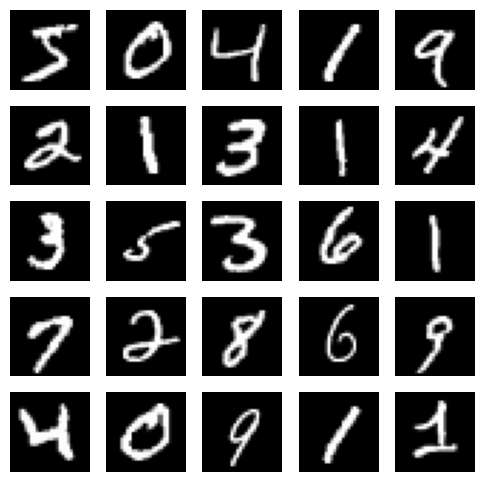

In [28]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

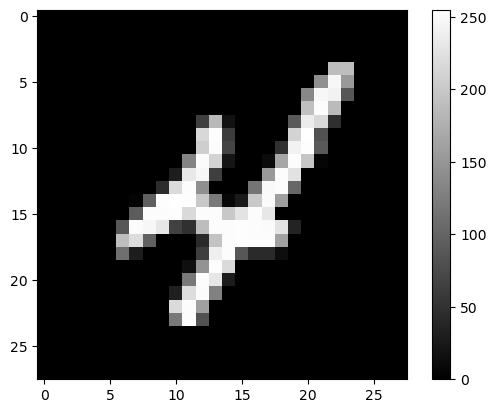

In [29]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

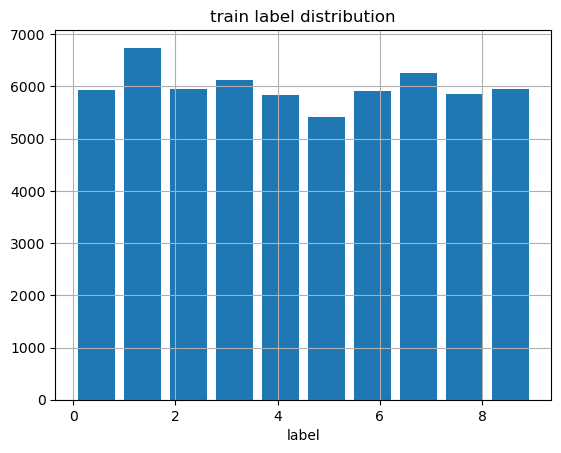

In [30]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')

plt.hist(t_train, bins=10, rwidth=0.8)

plt.show()

In [31]:
# 학습데이터 정답 분포 확인

label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [32]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩 (One-Hot Encoding)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [33]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28, 28)))  # Input 객체를 사용하여 입력 형태를 정의합니다.
model.add(tf.keras.layers.Flatten())  # Flatten 레이어는 여전히 필요합니다.
model.add(tf.keras.layers.Dense(100, activation='relu'))  # Dense 레이어 추가
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Dense 레이어 추가

In [34]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

#학습 시작 시간 기록
start_time = datetime.now()

# 모델 학습
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

# 학습 종료 시간 기록
end_time = datetime.now()

# 학습 시간 계산 및 출력
print("\nelapsed time = ", end_time - start_time) 

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.8596 - loss: 0.5023 - val_accuracy: 0.9433 - val_loss: 0.1972
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.9540 - loss: 0.1600 - val_accuracy: 0.9566 - val_loss: 0.1454
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9695 - loss: 0.1032 - val_accuracy: 0.9651 - val_loss: 0.1177
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.9758 - loss: 0.0768 - val_accuracy: 0.9652 - val_loss: 0.1210
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.9816 - loss: 0.0598 - val_accuracy: 0.9695 - val_loss: 0.1051
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.9865 - loss: 0.0458 - val_accuracy: 0.9702 - val_loss: 0.1006
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.9900 - loss: 0.0363 - val_accuracy: 0.9699 - val_loss: 0.1025
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.9923 -

In [36]:

model.evaluate(x_test, t_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.9727 - loss: 0.1585


[0.13587117195129395, 0.9757999777793884]

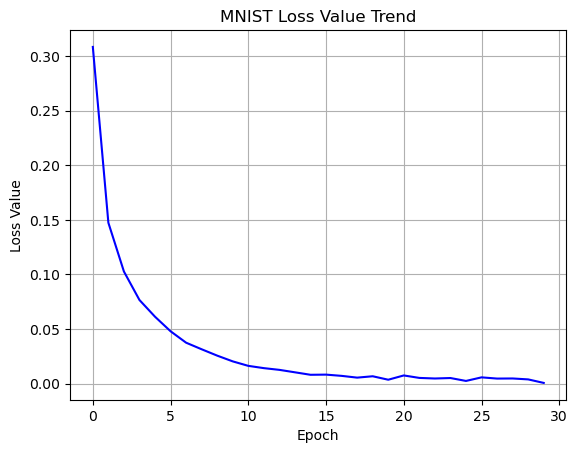

In [37]:
# 손실함수 추세 확인
import matplotlib.pyplot as plt

x_data_list = [index for index in range(len(hist.history['loss']))]
Y_DATA_LIST = hist.history['loss']  # 학습 손실 값을 사용

plt.title('MNIST Loss Value Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.grid()
plt.plot(x_data_list, Y_DATA_LIST, color='b')
plt.show()

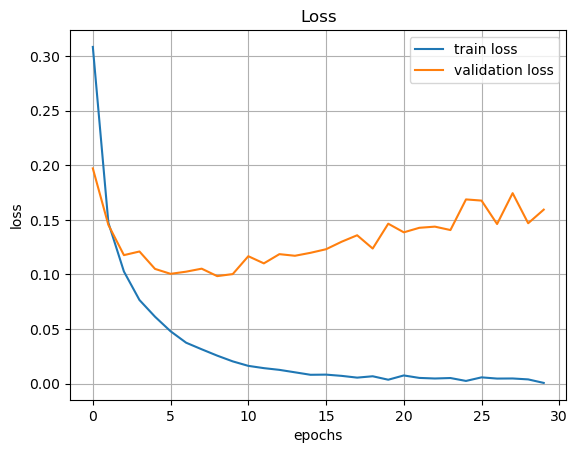

In [38]:

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

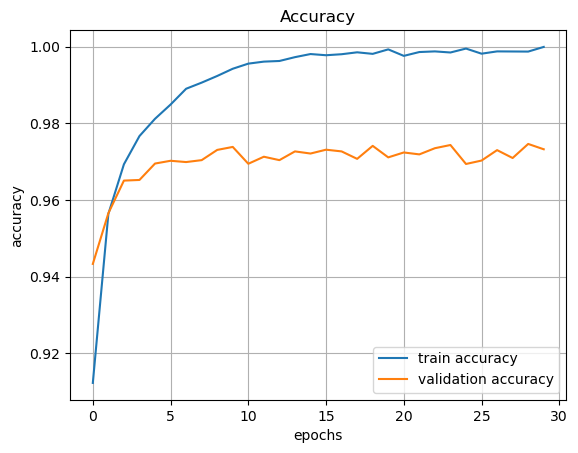

In [39]:

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


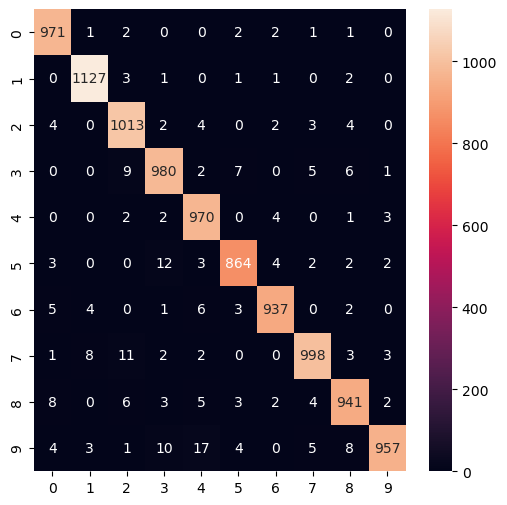

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [41]:

print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[ 971    1    2    0    0    2    2    1    1    0]
 [   0 1127    3    1    0    1    1    0    2    0]
 [   4    0 1013    2    4    0    2    3    4    0]
 [   0    0    9  980    2    7    0    5    6    1]
 [   0    0    2    2  970    0    4    0    1    3]
 [   3    0    0   12    3  864    4    2    2    2]
 [   5    4    0    1    6    3  937    0    2    0]
 [   1    8   11    2    2    0    0  998    3    3]
 [   8    0    6    3    5    3    2    4  941    2]
 [   4    3    1   10   17    4    0    5    8  957]]


label = 0	(971/980)	accuracy = 0.991
label = 1	(1127/1135)	accuracy = 0.993
label = 2	(1013/1032)	accuracy = 0.982
label = 3	(980/1010)	accuracy = 0.970
label = 4	(970/982)	accuracy = 0.988
label = 5	(864/892)	accuracy = 0.969
label = 6	(937/958)	accuracy = 0.978
label = 7	(998/1028)	accuracy = 0.971
label = 8	(941/974)	accuracy = 0.966
label = 9	(957/1009)	accuracy = 0.948


In [42]:

# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

for idx in range(len(t_test)):

    label = int(np.argmax(t_test[idx]))

    label_distribution[label] = label_distribution[label] + 1

    prediction = int(np.argmax(predicted_value[idx]))

    prediction_distribution[prediction] = prediction_distribution[prediction] + 1


print(label_distribution)
print(prediction_distribution)
     

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
[ 996. 1143. 1047. 1013. 1009.  884.  952. 1018.  970.  968.]
